In [ ]:
import numpy as np
from scipy.spatial import Voronoi
from mpl_toolkits.mplot3d.art3d import Line3DCollection
import matplotlib.pyplot as plt

# Define the number of seed points
num_points = 100
# Generate random points within a cubic domain
points = np.random.rand(num_points, 3)

# Compute the Voronoi tessellation of these points
vor = Voronoi(points)

# Gather the Voronoi edges
edges = []
for ridge_vertices in vor.ridge_vertices:
    if -1 not in ridge_vertices:
        edges.append([vor.vertices[i] for i in ridge_vertices])

# Plot the Voronoi edges
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the points
ax.scatter(points[:, 0], points[:, 1], points[:, 2], color='blue', s=1)

# Plot the edges
edge_collection = Line3DCollection(edges, color='green', lw=0.7)
ax.add_collection3d(edge_collection)

# Set the labels and show the plot
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
plt.title('3D Voronoi Tessellation for Mycelium Network Model')
plt.show()



In [ ]:
import numpy as np
from scipy.spatial import Voronoi

# Constants from the paper or your measurements
rho_f = 1.05  # Hyphae wall material density in g/cm3 (example value)
diameter = 4.8e-4  # Average diameter of the hyphae in cm (example value)
radius = diameter / 2
A = np.pi * radius ** 2  # Cross-sectional area in cm2 if hyphae are cylindrical

# Generate a Voronoi diagram within a unit cube RVE
num_points = 300  # number of seed points
points = np.random.rand(num_points, 3)
vor = Voronoi(points)

# Calculate the total length of all fibers
total_length = 0.0
for simplex in vor.ridge_vertices:
    simplex = np.asarray(simplex)
    if np.all(simplex >= 0):  # Check for finite ridges only
        total_length += np.linalg.norm(vor.vertices[simplex[0]] - vor.vertices[simplex[1]])

# The volume of the RVE (unit cube for this example)
V = 1.0  # Volume in cm3 if using a unit cube

# Calculate network's density
rho = (rho_f * A * total_length) / V
print(f"The network's density is: {rho} g/cm3")


In [ ]:
import numpy as np
from scipy.spatial import Voronoi
import pyvista as pv

# Constants from the paper or your measurements
rho_f = 1.05  # Hyphae wall material density in g/cm3 (example value)
diameter = 4.8e-4  # Average diameter of the hyphae in cm (example value)
radius = diameter / 2
A = np.pi * radius ** 2  # Cross-sectional area in cm2 if hyphae are cylindrical

# Generate a Voronoi diagram within a unit cube RVE
num_points = 200  # number of seed points
points = np.random.rand(num_points, 3)
vor = Voronoi(points)

# Calculate the total length of all fibers
total_length = 0.0
edges = []
for simplex in vor.ridge_vertices:
    if -1 not in simplex:  # This removes infinite ridges
        # Extract vertices for each edge
        for i in range(len(simplex)-1):
            # For each consecutive pair of vertices
            start, end = vor.vertices[simplex[i]], vor.vertices[simplex[i+1]]
            # Calculate edge length only if it's within the unit cube
            if all(0 <= x <= 1 for x in start) and all(0 <= x <= 1 for x in end):
                length = np.linalg.norm(end - start)
                total_length += length
                edges.append((start, end))

# The volume of the RVE (unit cube for this example)
V = 1.0  # Volume in cm3 if using a unit cube

# Calculate network's density
rho = (rho_f * A * total_length) / V
print(f"The network's density is: {rho} g/cm3")

# Visualization with PyVista
plotter = pv.Plotter()
for edge in edges:  # Use 'edges' instead of 'lines'
    plotter.add_lines(np.array(edge), color='green', width=2)
plotter.show_grid()
plotter.show()



In [ ]:
import numpy as np
from scipy.spatial import Voronoi
import matplotlib.pyplot as plt

# Constants from the paper or your measurements
rho_f = 1.05  # Hyphae wall material density in g/cm3 (example value)
diameter = 4.8e-4  # Average diameter of the hyphae in cm (example value)
radius = diameter / 2
A = np.pi * radius ** 2  # Cross-sectional area in cm2 if hyphae are cylindrical
V = 1.0  # Volume in cm3 if using a unit cube

# Define the range of num_points to iterate over
num_points_range = range(50, 1000, 50)  # From 50 to 500, in steps of 50

densities = []  # To store the calculated densities

for num_points in num_points_range:
    points = np.random.rand(num_points, 3)
    vor = Voronoi(points)
    
    # Calculate the total length of all fibers
    total_length = 0.0
    for simplex in vor.ridge_vertices:
        if -1 not in simplex:  # This removes infinite ridges
            # Extract vertices for each edge
            for i in range(len(simplex)-1):
                # For each consecutive pair of vertices
                start, end = vor.vertices[simplex[i]], vor.vertices[simplex[i+1]]
                # Calculate edge length only if it's within the unit cube
                if all(0 <= x <= 1 for x in start) and all(0 <= x <= 1 for x in end):
                    length = np.linalg.norm(end - start)
                    total_length += length

    # Calculate network's density
    rho = (rho_f * A * total_length) / V
    densities.append(rho)

# Plotting network density versus number of points
plt.figure(figsize=(10, 6))
plt.plot(num_points_range, densities, marker='o', linestyle='-', color='b')
plt.title("Network Density vs. Number of Points")
plt.xlabel("Number of Points")
plt.ylabel("Network Density (g/cm³)")
plt.grid(True)
plt.show()


In [ ]:
import numpy as np
from scipy.spatial import Voronoi
import matplotlib.pyplot as plt

# Constants
rho_f = 1.05  # Hyphae wall material density in g/cm3
diameter = 4.8e-4  # Average diameter of the hyphae in cm
radius = diameter / 2
A = np.pi * radius ** 2  # Cross-sectional area in cm2
V = 1.0  # Volume in cm3 for a unit cube

# Range of seed points
num_points_range = range(50, 1001, 50)  # From 50 to 500, in steps of 50

# Initialize lists for storing results
densities = []
density_changes = []

# Define the saturation threshold
saturation_threshold = 0.5  # Percentage

for num_points in num_points_range:
    points = np.random.rand(num_points, 3)
    vor = Voronoi(points)
    
    # Calculate total length of all fibers
    total_length = 0.0
    for simplex in vor.ridge_vertices:
        if -1 not in simplex:
            for i in range(len(simplex)-1):
                start, end = vor.vertices[simplex[i]], vor.vertices[simplex[i+1]]
                if all(0 <= x <= 1 for x in start) and all(0 <= x <= 1 for x in end):
                    length = np.linalg.norm(end - start)
                    total_length += length

    # Calculate and store network density
    rho = (rho_f * A * total_length) / V
    densities.append(rho)
    
    # Calculate and store the percentage change in density (for points after the first)
    if len(densities) > 1:
        change = 100 * (densities[-1] - densities[-2]) / densities[-2]
        density_changes.append(change)

# Plotting
plt.figure(figsize=(14, 6))

# Network Density vs. Number of Points
plt.subplot(1, 2, 1)
plt.plot(num_points_range, densities, marker='o', linestyle='-', color='b')
plt.title("Network Density vs. Number of Points")
plt.xlabel("Number of Points")
plt.ylabel("Network Density (g/cm³)")
plt.grid(True)

# Percentage Change in Density vs. Number of Points
# Adjust num_points_range for plotting changes (exclude the first point which has no change)
adjusted_num_points_range = list(num_points_range)[1:]
plt.subplot(1, 2, 2)
plt.plot(adjusted_num_points_range, density_changes, marker='x', linestyle='-', color='r')
plt.title("Percentage Change in Density vs. Number of Points")
plt.xlabel("Number of Points")
plt.ylabel("Percentage Change in Density (%)")
plt.axhline(y=saturation_threshold, color='g', linestyle='--', label=f'Saturation Threshold ({saturation_threshold}%)')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import Voronoi

def generate_cylinder_points(radius, height, num_points):
    points = []
    for _ in range(num_points):
        angle = np.random.uniform(0, 2 * np.pi)
        r = radius * np.sqrt(np.random.uniform(0, 1))
        x = r * np.cos(angle)
        y = r * np.sin(angle)
        z = np.random.uniform(0, height)
        points.append([x, y, z])
    return np.array(points)

def calculate_network_density(points, volume):
    vor = Voronoi(points[:, :2])  # Using 2D projection for simplicity
    total_length = 0.0
    for simplex in vor.ridge_vertices:
        if all(v >= 0 for v in simplex):  # Ignore ridges extending to infinity
            total_length += np.linalg.norm(vor.vertices[simplex[0]] - vor.vertices[simplex[1]])
    # Assuming uniform density across the fibers
    rho_f = 1.05  # g/cm^3
    diameter = 4.8e-4  # cm
    A = np.pi * (diameter / 2) ** 2
    rho = (rho_f * A * total_length) / volume
    edges = []
    for ridge_vertices in vor.ridge_vertices:
        if -1 not in ridge_vertices:
            edges.append([vor.vertices[i] for i in ridge_vertices])
    return rho, edges

# Parameters for different volumes
heights = [2, 4, 6, 8, 10]  # Example heights with a fixed radius to vary the volume
radius = 1
num_points_range = range(100, 1001, 100)  # From 100 to 1000 in steps of 100

# Store results
results = {height: [] for height in heights}

for height in heights:
    volume = np.pi * radius**2 * height
    for num_points in num_points_range:
        points = generate_cylinder_points(radius, height, num_points)
        rho, edges = calculate_network_density(points, volume)
        results[height].append(rho)

# Plotting network density vs. number of points
plt.figure(figsize=(14, 7))

for height, densities in results.items():
    plt.plot(num_points_range, densities, marker='o', linestyle='-', label=f'Height {height} cm')

plt.title("Network Density vs. Number of Points for Different Cylinder Heights")
plt.xlabel("Number of Points")
plt.ylabel("Network Density (g/cm³)")
plt.legend()
plt.grid(True)
plt.show()

# Plotting percentage change in network density vs. points
plt.figure(figsize=(14, 7))

for height in heights:
    changes = [100 * (densities[i] - densities[i-1]) / densities[i-1] for i in range(1, len(densities))]
    plt.plot(list(num_points_range)[1:], changes, marker='x', linestyle='-', label=f'Height {height} cm')

plt.title("Percentage Change in Network Density vs. Number of Points")
plt.xlabel("Number of Points")
plt.ylabel("Percentage Change in Density (%)")
plt.legend()
plt.grid(True)
plt.show()



In [ ]:
import numpy as np
from scipy.spatial import Voronoi
from mpl_toolkits.mplot3d.art3d import Line3DCollection
import matplotlib.pyplot as plt
# Gather the Voronoi edges


# Plot the Voronoi edges
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the points
ax.scatter(points[:, 0], points[:, 1], points[:, 2], color='blue', s=1)

# Plot the edges
edge_collection = Line3DCollection(edges, color='green', lw=0.7)
ax.add_collection3d(edge_collection)

# Set the labels and show the plot
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
plt.title('3D Voronoi Tessellation for Mycelium Network Model')
plt.show()

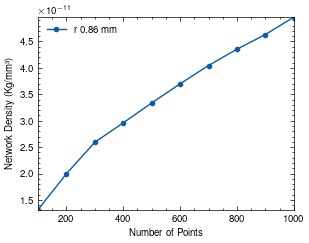

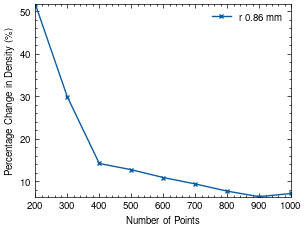

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import Voronoi

def generate_cylinder_points(radius, height, num_points):
    points = []
    for _ in range(num_points):
        angle = np.random.uniform(0, 2 * np.pi)
        r = radius * np.sqrt(np.random.uniform(0, 1))
        x = r * np.cos(angle)
        y = r * np.sin(angle)
        z = np.random.uniform(0, height)
        points.append([x, y, z])
    return np.array(points)

def is_edge_inside_cylinder(start, end, radius):
    # Check if both points of an edge are within the cylinder's radius
    return np.sqrt(start[0]**2 + start[1]**2) <= radius and np.sqrt(end[0]**2 + end[1]**2) <= radius

def calculate_network_density(points, volume, radius):
    vor = Voronoi(points[:, :2])  # Using 2D projection for simplicity
    total_length = 0.0
    for simplex in vor.ridge_vertices:
        if all(v >= 0 for v in simplex):  # Ignore ridges extending to infinity
            start, end = vor.vertices[simplex[0]], vor.vertices[simplex[1]]
            if is_edge_inside_cylinder(start, end, radius):
                total_length += np.linalg.norm(start - end)
    # Assuming uniform density across the fibers
    # rho_f = 1.05  # g/cm^3
    rho_f = 1.05e-6 # kg/mm^3
    # diameter = 4.8e-4  # cm
    diameter = 0.0048 # mm
    A = np.pi * (diameter / 2) ** 2
    rho = (rho_f * A * total_length) / volume
    return rho

# Parameters for different volumes
height = 15  # Example heights with a fixed radius to vary the volume
radius = [0.1, 0.3, 0.6, 0.86, 1, 1.5, 2]
num_points_range = range(100, 1001, 100)  # From 100 to 1000 in steps of 100

# Store results
results = {r: [] for r in radius}

for r in radius:
    volume = np.pi * r**2 * height
    for num_points in num_points_range:
        points = generate_cylinder_points(r, height, num_points)
        rho = calculate_network_density(points, volume, r)
        results[r].append(rho)

with plt.style.context(['science', 'nature']):

    # Plotting network density vs. number of points
    fig, ax = plt.subplots()

    for r, densities in results.items():
        plt.plot(num_points_range, densities, marker='o', linestyle='-', label=f'r {r} mm')

    # plt.title("Network Density vs. Number of Points for Different Cylinder Heights")
    plt.xlabel("Number of Points")
    plt.ylabel("Network Density (Kg/mm³)")
    plt.legend()
    # plt.grid(True)
    plt.autoscale(tight=True)
    fig.savefig('network_density_vs_points.png', dpi=300)
    fig.savefig('network_density_vs_points.pdf', dpi=300)
    plt.show()

with plt.style.context(['science', 'nature']):
    # Plotting percentage change in network density vs. points
    fig, ax = plt.subplots()

    for r, densities in results.items():
        changes = [100 * (densities[i] - densities[i-1]) / densities[i-1] for i in range(1, len(densities))]
        plt.plot(list(num_points_range)[1:], changes, marker='x', linestyle='-', label=f'r {r} mm')

    # plt.title("Percentage Change in Network Density vs. Number of Points for Different Cylinder Heights")
    plt.xlabel("Number of Points")
    plt.ylabel("Percentage Change in Density (\%)")
    plt.legend()
    # plt.grid(True)
    plt.autoscale(tight=True)
    fig.savefig('percentage_change_density_vs_points.png', dpi=300)
    fig.savefig('percentage_change_density_vs_points.pdf', dpi=300)
    plt.show()


In [ ]:
import numpy as np
import pyvista as pv
from scipy.spatial import Voronoi

def generate_cylinder_points(radius, height, num_points):
    points = []
    for _ in range(num_points):
        angle = np.random.uniform(0, 2 * np.pi)
        r = radius * np.sqrt(np.random.uniform(0, 1))
        x = r * np.cos(angle)
        y = r * np.sin(angle)
        z = np.random.uniform(0, height)
        points.append([x, y, z])
    return np.array(points)

def point_inside_cylinder(point, radius):
    return np.sqrt(point[0]**2 + point[1]**2) <= radius

radius = 0.86 * 2  # Example value
height = 15
num_points = 400

points = generate_cylinder_points(radius, height, num_points)
vor = Voronoi(points[:, :2])

plotter = pv.Plotter()

cylinder = pv.Cylinder(center=(0, 0, height / 2), radius=radius, height=height, direction=(0, 0, 1))
plotter.add_mesh(cylinder, color="lightgrey", opacity=0.5)

for simplex in vor.ridge_vertices:
    if all(v >= 0 for v in simplex):
        start, end = vor.vertices[simplex[0]], vor.vertices[simplex[1]]
        # Extend the 2D points to 3D by adding a Z-coordinate
        start_3d = np.append(start, 0)  # Assuming Z=0 for visualization
        end_3d = np.append(end, 0)      # Assuming Z=0 for visualization
        if point_inside_cylinder(start, radius) and point_inside_cylinder(end, radius):
            line = pv.Line(start_3d, end_3d)
            plotter.add_mesh(line, color='white', line_width=2)

plotter.show()


In [ ]:
import numpy as np
import pyvista as pv
from scipy.spatial import Voronoi, voronoi_plot_2d

def generate_cylinder_points(radius, height, num_points):
    points = []
    for _ in range(num_points):
        angle = np.random.uniform(0, 2 * np.pi)
        r = radius * np.sqrt(np.random.uniform(0, 1))
        x = r * np.cos(angle)
        y = r * np.sin(angle)
        z = np.random.uniform(0, height)
        points.append([x, y, z])
    return np.array(points)

def point_inside_cylinder(point, radius, height):
    return np.sqrt(point[0]**2 + point[1]**2) <= radius and 0 <= point[2] <= height

radius = 0.86 * 2  # Example value
height = 15
num_points = 200

points = generate_cylinder_points(radius, height, num_points)
vor = Voronoi(points)  # Use the 3D points directly

plotter = pv.Plotter()

cylinder = pv.Cylinder(center=(0, 0, height / 2), radius=radius, height=height, direction=(0, 0, 1))
plotter.add_mesh(cylinder, color="lightgrey", opacity=0.5)

# Iterate through each ridge and plot
for ridge_points in vor.ridge_points:
    point_start, point_end = points[ridge_points[0]], points[ridge_points[1]]
    if point_inside_cylinder(point_start, radius, height) and point_inside_cylinder(point_end, radius, height):
        line = pv.Line(point_start, point_end)
        plotter.add_mesh(line, color='white', line_width=2)

plotter.show()
